## HW2: Linear Discriminant Analysis
In hw2, you need to implement [Fisher’s linear discriminant](https://towardsdatascience.com/fishers-linear-discriminant-intuitively-explained-52a1ba79e1bb) by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get **zero point** by simply calling `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` 

## Load data

In [2]:
import numpy as np

In [5]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3750, 2)
(3750,)
(1250, 2)
(1250,)


## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [7]:
## Your code HERE
class1 = []
class2 = []
# classify the vectors in training data
for i in range(3750):
    if y_train[i] == 0:
        class1.append(x_train[i])
    elif y_train[i] == 1:
        class2.append(x_train[i])
# get the mean
m1 = np.mean(class1, axis=0)
m2 = np.mean(class2, axis=0)

In [8]:
print(f"mean vector of class 1: {m1}", f"mean vector of class 2: {m2}")

mean vector of class 1: [ 0.99253136 -0.99115481] mean vector of class 2: [-0.9888012   1.00522778]


## 2. Compute the Within-class scatter matrix SW

In [9]:
# Your code HERE
sw1 = np.cov(np.transpose(class1))
sw2 = np.cov(np.transpose(class2))
sw = sw1 + sw2

In [10]:
print(f"Within-class scatter matrix SW: {sw}")

Within-class scatter matrix SW: [[ 2.31560974 -0.95793362]
 [-0.95793362  1.50940428]]


## 3.  Compute the Between-class scatter matrix SB

In [11]:
## Your code HERE
m = m2 - m1
arr = np.array([[m[0]], [m[1]]])
sb = arr @ np.transpose(arr)

In [12]:
print(f"Between-class scatter matrix SB: {sb}")

Between-class scatter matrix SB: [[ 3.92567873 -3.95549783]
 [-3.95549783  3.98554344]]


## 4. Compute the Fisher’s linear discriminant

In [13]:
## Your code HERE
W = np.dot(np.linalg.inv(sw) , (m2 - m1))
w = W / np.linalg.norm(W)

In [14]:
print(f" Fisher’s linear discriminant: {w}")

 Fisher’s linear discriminant: [-0.36794232  0.92984862]


## 5. Project the test data by linear discriminant and get the class prediction by `K` nearest-neighbor rule. Please report the accuracy score with `K` values from 1 to 5
you can use `accuracy_score` function from `sklearn.metric.accuracy_score`

In [15]:
def predict(k):
    y_pred = []
    projectTrain = x_train.dot(np.transpose(w))
    for x in x_test:
        projectTest = x.dot(np.transpose(w))
        distance = []
        for i in range(len(projectTrain)):
            d = abs(projectTest - projectTrain[i])
            distance.append([d, i])
        distance.sort()
        dist = distance[:k]
        options = []
        for dis in dist:
            options.append(y_train[dis[1]])
        if options.count(0) >= options.count(1):
            prediction = 0
        else: 
            prediction = 1
        y_pred.append(prediction)
    return y_pred

In [16]:
from sklearn.metrics import accuracy_score
for i in range(1, 6): 
    print(f"k = {i}:") 
    y_pred = predict(i)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy of test-set {acc}")

k = 1:
Accuracy of test-set 0.8584
k = 2:
Accuracy of test-set 0.8656
k = 3:
Accuracy of test-set 0.8816
k = 4:
Accuracy of test-set 0.888
k = 5:
Accuracy of test-set 0.8928


## 6. Plot the 1) best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization) 2) colorize the data with each class 3) project all data points on your projection line. Your result should look like [this image](https://i.imgur.com/tubMQpw.jpg)

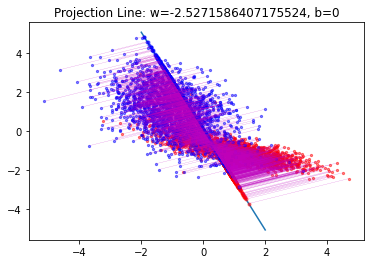

In [17]:
# calculate the elements used
m = w[1] / w[0]
x = np.linspace(-2, 2)
y = m * x + 0
c11 = np.transpose(class1)[0] # class 1 featrue 1
c12 = np.transpose(class1)[1] # class 1 feature 2
c21 = np.transpose(class2)[0] # class 2 feature 1 
c22 = np.transpose(class2)[1] # class 2 feature 2
projectC11 = np.transpose(class1 @ w.reshape(w.shape[0], 1) / np.sum(w**2) * w.reshape(1, w.shape[0]))[0]
projectC12 = np.transpose(class1 @ w.reshape(w.shape[0], 1) / np.sum(w**2) * w.reshape(1, w.shape[0]))[1] 
projectC21 = np.transpose(class2 @ w.reshape(w.shape[0], 1) / np.sum(w**2) * w.reshape(1, w.shape[0]))[0]
projectC22 = np.transpose(class2 @ w.reshape(w.shape[0], 1) / np.sum(w**2) * w.reshape(1, w.shape[0]))[1] 

# plotting
from turtle import color
import matplotlib.pyplot as plt
plt.title(f'Projection Line: w={m}, b=0')
plt.scatter(c11, c12, color='r', s=5, alpha=0.5)
plt.scatter(c21, c22, color='b', s=5, alpha=0.5)
plt.plot(x, y)
plt.plot(projectC11, projectC12, 'r.', alpha=0.5)
plt.plot(projectC21, projectC22, 'b.', alpha=0.5)
for i in range(c11.shape[0]):
    plt.plot([c11[i], projectC11[i]], [c12[i], projectC12[i]], 'm', linewidth=0.2, alpha=0.65)
for i in range(c12.shape[0]):
    plt.plot([c21[i], projectC21[i]], [c22[i], projectC22[i]], 'm', linewidth=0.2, alpha=0.65)